# KNN Project

Mobile Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [3]:
mydata = pd.read_csv("Mobile_data.csv")

In [4]:
mydata

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0      2         20       756  2549     9     7         19            1  
1      6        905      1988  2631    17     3          7            2  
2      6       1263      1716  2603    11     2          9            2  
3      9       1216      1786  2769    16     8         11            2  
4     14       1208      1212  1411     8     2         15            1  
...   ..        ...       ...   ...   ...   ...        ...          ...  
1995  14       1222      1890   668    13     4         19            0  
1996   3        915      1965  2032    11    10         16            2  
1997   3        868      1632  3057     9     1          5            3  
1998   5        336       670   869    18    10         19            0  
1999  16        483       754  3919    19     4          2            3  

[2000 rows x 15 columns]

# Deriving the information of the dataset

In [5]:
mydata.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


# Checking for Null values

In [7]:
mydata.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

# Checking for Outliers

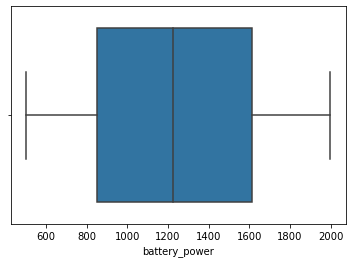

In [8]:
sns.boxplot(x=mydata['battery_power']);

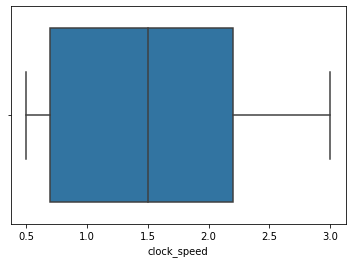

In [9]:
sns.boxplot(x=mydata['clock_speed']);

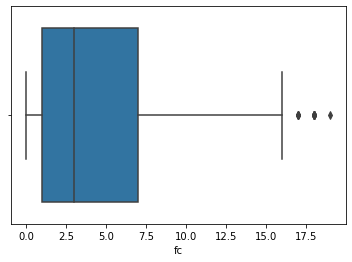

In [10]:
sns.boxplot(x=mydata['fc']);

In [11]:
dfw = mydata['fc']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [12]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

95      18
169     17
226     18
229     17
300     17
305     18
372     17
584     17
1387    18
1406    18
1416    18
1549    17
1554    18
1693    18
1705    19
1880    18
1882    18
1888    18
Name: fc, dtype: int64

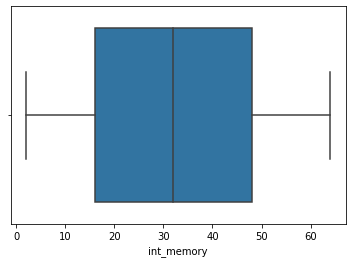

In [13]:
sns.boxplot(x=mydata['int_memory']);

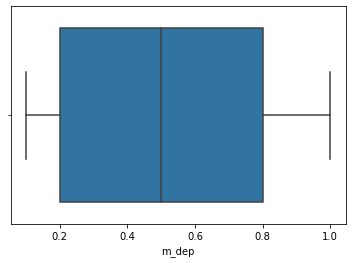

In [14]:
sns.boxplot(x=mydata['m_dep']);

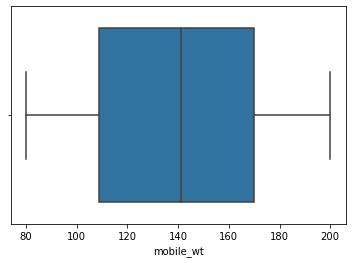

In [15]:
sns.boxplot(x=mydata['mobile_wt']);

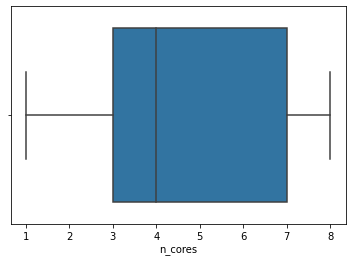

In [16]:
sns.boxplot(x=mydata['n_cores']);

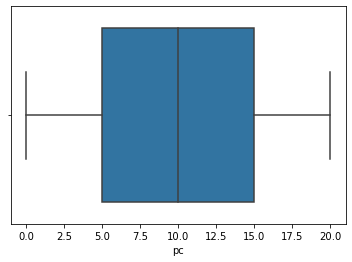

In [17]:
sns.boxplot(x=mydata['pc']);

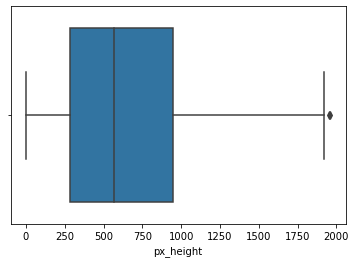

In [18]:
sns.boxplot(x=mydata['px_height']);

In [19]:
dfw1 = mydata['px_height']
dfw1_Q1 = dfw1.quantile(0.25)
dfw1_Q3 = dfw1.quantile(0.75)
dfw1_IQR = dfw1_Q3 - dfw1_Q1
dfw1_lowerend = dfw1_Q1 - (1.5 * dfw1_IQR)
dfw1_upperend = dfw1_Q3 + (1.5 * dfw1_IQR)

In [20]:
dfw1_outliers = dfw1[(dfw1 < dfw1_lowerend) | (dfw1 > dfw1_upperend)]
dfw1_outliers

988     1949
1771    1960
Name: px_height, dtype: int64

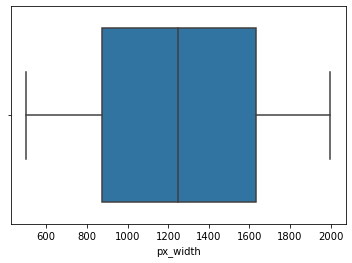

In [21]:
sns.boxplot(x=mydata['px_width']);

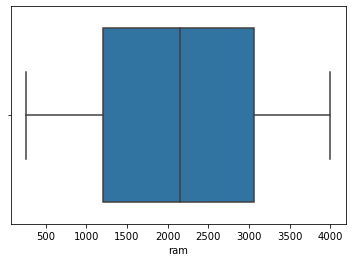

In [22]:
sns.boxplot(x=mydata['ram']);

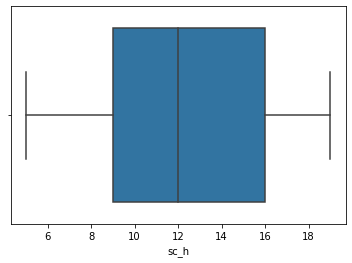

In [23]:
sns.boxplot(x=mydata['sc_h']);

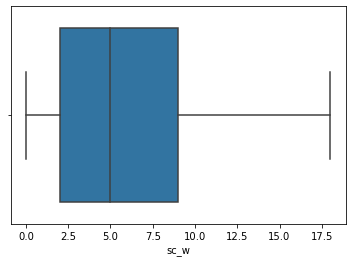

In [24]:
sns.boxplot(x=mydata['sc_w']);

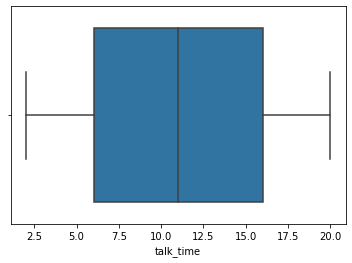

In [25]:
sns.boxplot(x=mydata['talk_time']);

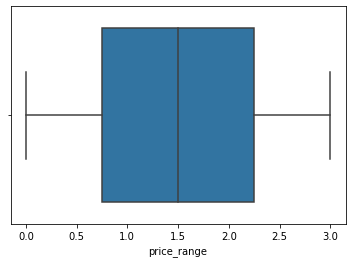

In [26]:
sns.boxplot(x=mydata['price_range']);

# Outliers of the Dataset:

In [27]:
mydata1 = mydata.drop([95,169,226,229,300,305,372,584,988,1387,1406,1416,1549,1554,1693,1705,1771,1880,1882,1888]) 

In [28]:
mydata1.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    1980.000000  1980.000000  1980.000000  1980.000000  1980.000000   
mean     1236.402020     1.521162     4.189899    32.055051     0.502222   
std       439.568762     0.817236     4.168422    18.126820     0.288722   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       849.500000     0.700000     1.000000    16.000000     0.200000   
50%      1224.000000     1.500000     3.000000    32.000000     0.500000   
75%      1614.000000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    16.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  1980.000000  1980.000000  1980.000000  1980.000000  1980.000000   
mean    140.168182     4.527273     9.836364   641.183838  1249.646465   
std      35.385004     2.291263     6.023408   439.957961   431.606730   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   281.750000   874.000000   
50%     141.000000     4.000000    10.000000   561.500000  1247.000000   
75%     170.000000     7.000000    15.000000   942.000000  1629.250000   
max     200.000000     8.000000    20.000000  1920.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  1980.000000  1980.000000  1980.000000  1980.000000  1980.000000  
mean   2125.135859    12.316667     5.773737    11.003535     1.497980  
std    1084.556984     4.209307     4.358066     5.458048     1.117863  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1209.750000     9.000000     2.000000     6.000000     0.000000  
50%    2146.500000    12.000000     5.000000    11.000000     1.000000  
75%    3066.500000    16.000000     9.000000    16.000000     2.000000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [29]:
mydata1['price_range'].value_counts()

0    496
2    496
1    495
3    493
Name: price_range, dtype: int64

# Correlation

In [30]:
mydata1.corr()

battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.010136  0.020317   -0.008197  0.034834   
clock_speed         0.010136     1.000000 -0.006342    0.004461 -0.011400   
fc                  0.020317    -0.006342  1.000000   -0.025745  0.004310   
int_memory         -0.008197     0.004461 -0.025745    1.000000  0.006426   
m_dep               0.034834    -0.011400  0.004310    0.006426  1.000000   
mobile_wt           0.002575     0.011939  0.014011   -0.030009  0.018595   
n_cores            -0.026451    -0.005638 -0.001971   -0.026662 -0.003834   
pc                  0.025013    -0.009017  0.635564   -0.030888  0.030108   
px_height           0.014290    -0.011326 -0.027777    0.009328  0.024797   
px_width           -0.008205    -0.009050 -0.012505   -0.011010  0.022394   
ram                -0.000121     0.004628  0.019440    0.033712 -0.011402   
sc_h               -0.023784    -0.026876  0.000372    0.039791 -0.027314   
sc_w               -0.016533    -0.005777 -0.001778    0.012055 -0.019880   
talk_time           0.047909    -0.010122 -0.008136   -0.010334  0.015418   
price_range         0.200763    -0.006120  0.021120    0.043458 -0.000925   

               mobile_wt   n_cores        pc  px_height  px_width       ram  \
battery_power   0.002575 -0.026451  0.025013   0.014290 -0.008205 -0.000121   
clock_speed     0.011939 -0.005638 -0.009017  -0.011326 -0.009050  0.004628   
fc              0.014011 -0.001971  0.635564  -0.027777 -0.012505  0.019440   
int_memory     -0.030009 -0.026662 -0.030888   0.009328 -0.011010  0.033712   
m_dep           0.018595 -0.003834  0.030108   0.024797  0.022394 -0.011402   
mobile_wt       1.000000 -0.018240  0.013121  -0.000223 -0.000128 -0.004555   
n_cores        -0.018240  1.000000  0.004900  -0.003893  0.025602  0.008277   
pc              0.013121  0.004900  1.000000  -0.025150  0.001728  0.031317   
px_height      -0.000223 -0.003893 -0.025150   1.000000  0.506294 -0.024568   
px_width       -0.000128  0.025602  0.001728   0.506294  1.000000  0.003795   
ram            -0.004555  0.008277  0.031317  -0.024568  0.003795  1.000000   
sc_h           -0.032044 -0.002913  0.011671   0.055978  0.018325  0.017816   
sc_w           -0.019790  0.024048 -0.017581   0.036888  0.031277  0.034949   
talk_time       0.010434  0.015609  0.015342  -0.011667  0.004499  0.011287   
price_range    -0.031628  0.008307  0.033871   0.144277  0.165132  0.917009   

                   sc_h      sc_w  talk_time  price_range  
battery_power -0.023784 -0.016533   0.047909     0.200763  
clock_speed   -0.026876 -0.005777  -0.010122    -0.006120  
fc             0.000372 -0.001778  -0.008136     0.021120  
int_memory     0.039791  0.012055  -0.010334     0.043458  
m_dep         -0.027314 -0.019880   0.015418    -0.000925  
mobile_wt     -0.032044 -0.019790   0.010434    -0.031628  
n_cores       -0.002913  0.024048   0.015609     0.008307  
pc             0.011671 -0.017581   0.015342     0.033871  
px_height      0.055978  0.036888  -0.011667     0.144277  
px_width       0.018325  0.031277   0.004499     0.165132  
ram            0.017816  0.034949   0.011287     0.917009  
sc_h           1.000000  0.504243  -0.013949     0.025641  
sc_w           0.504243  1.000000  -0.020700     0.038076  
talk_time     -0.013949 -0.020700   1.000000     0.020582  
price_range    0.025641  0.038076   0.020582     1.000000

<AxesSubplot:>

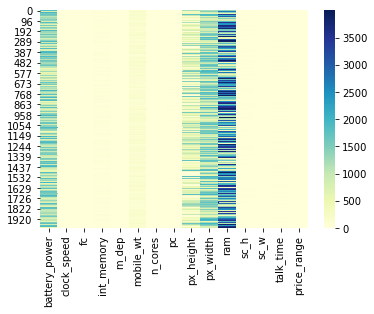

In [31]:
sns.heatmap(data=mydata1,annot=False,cmap='YlGnBu')

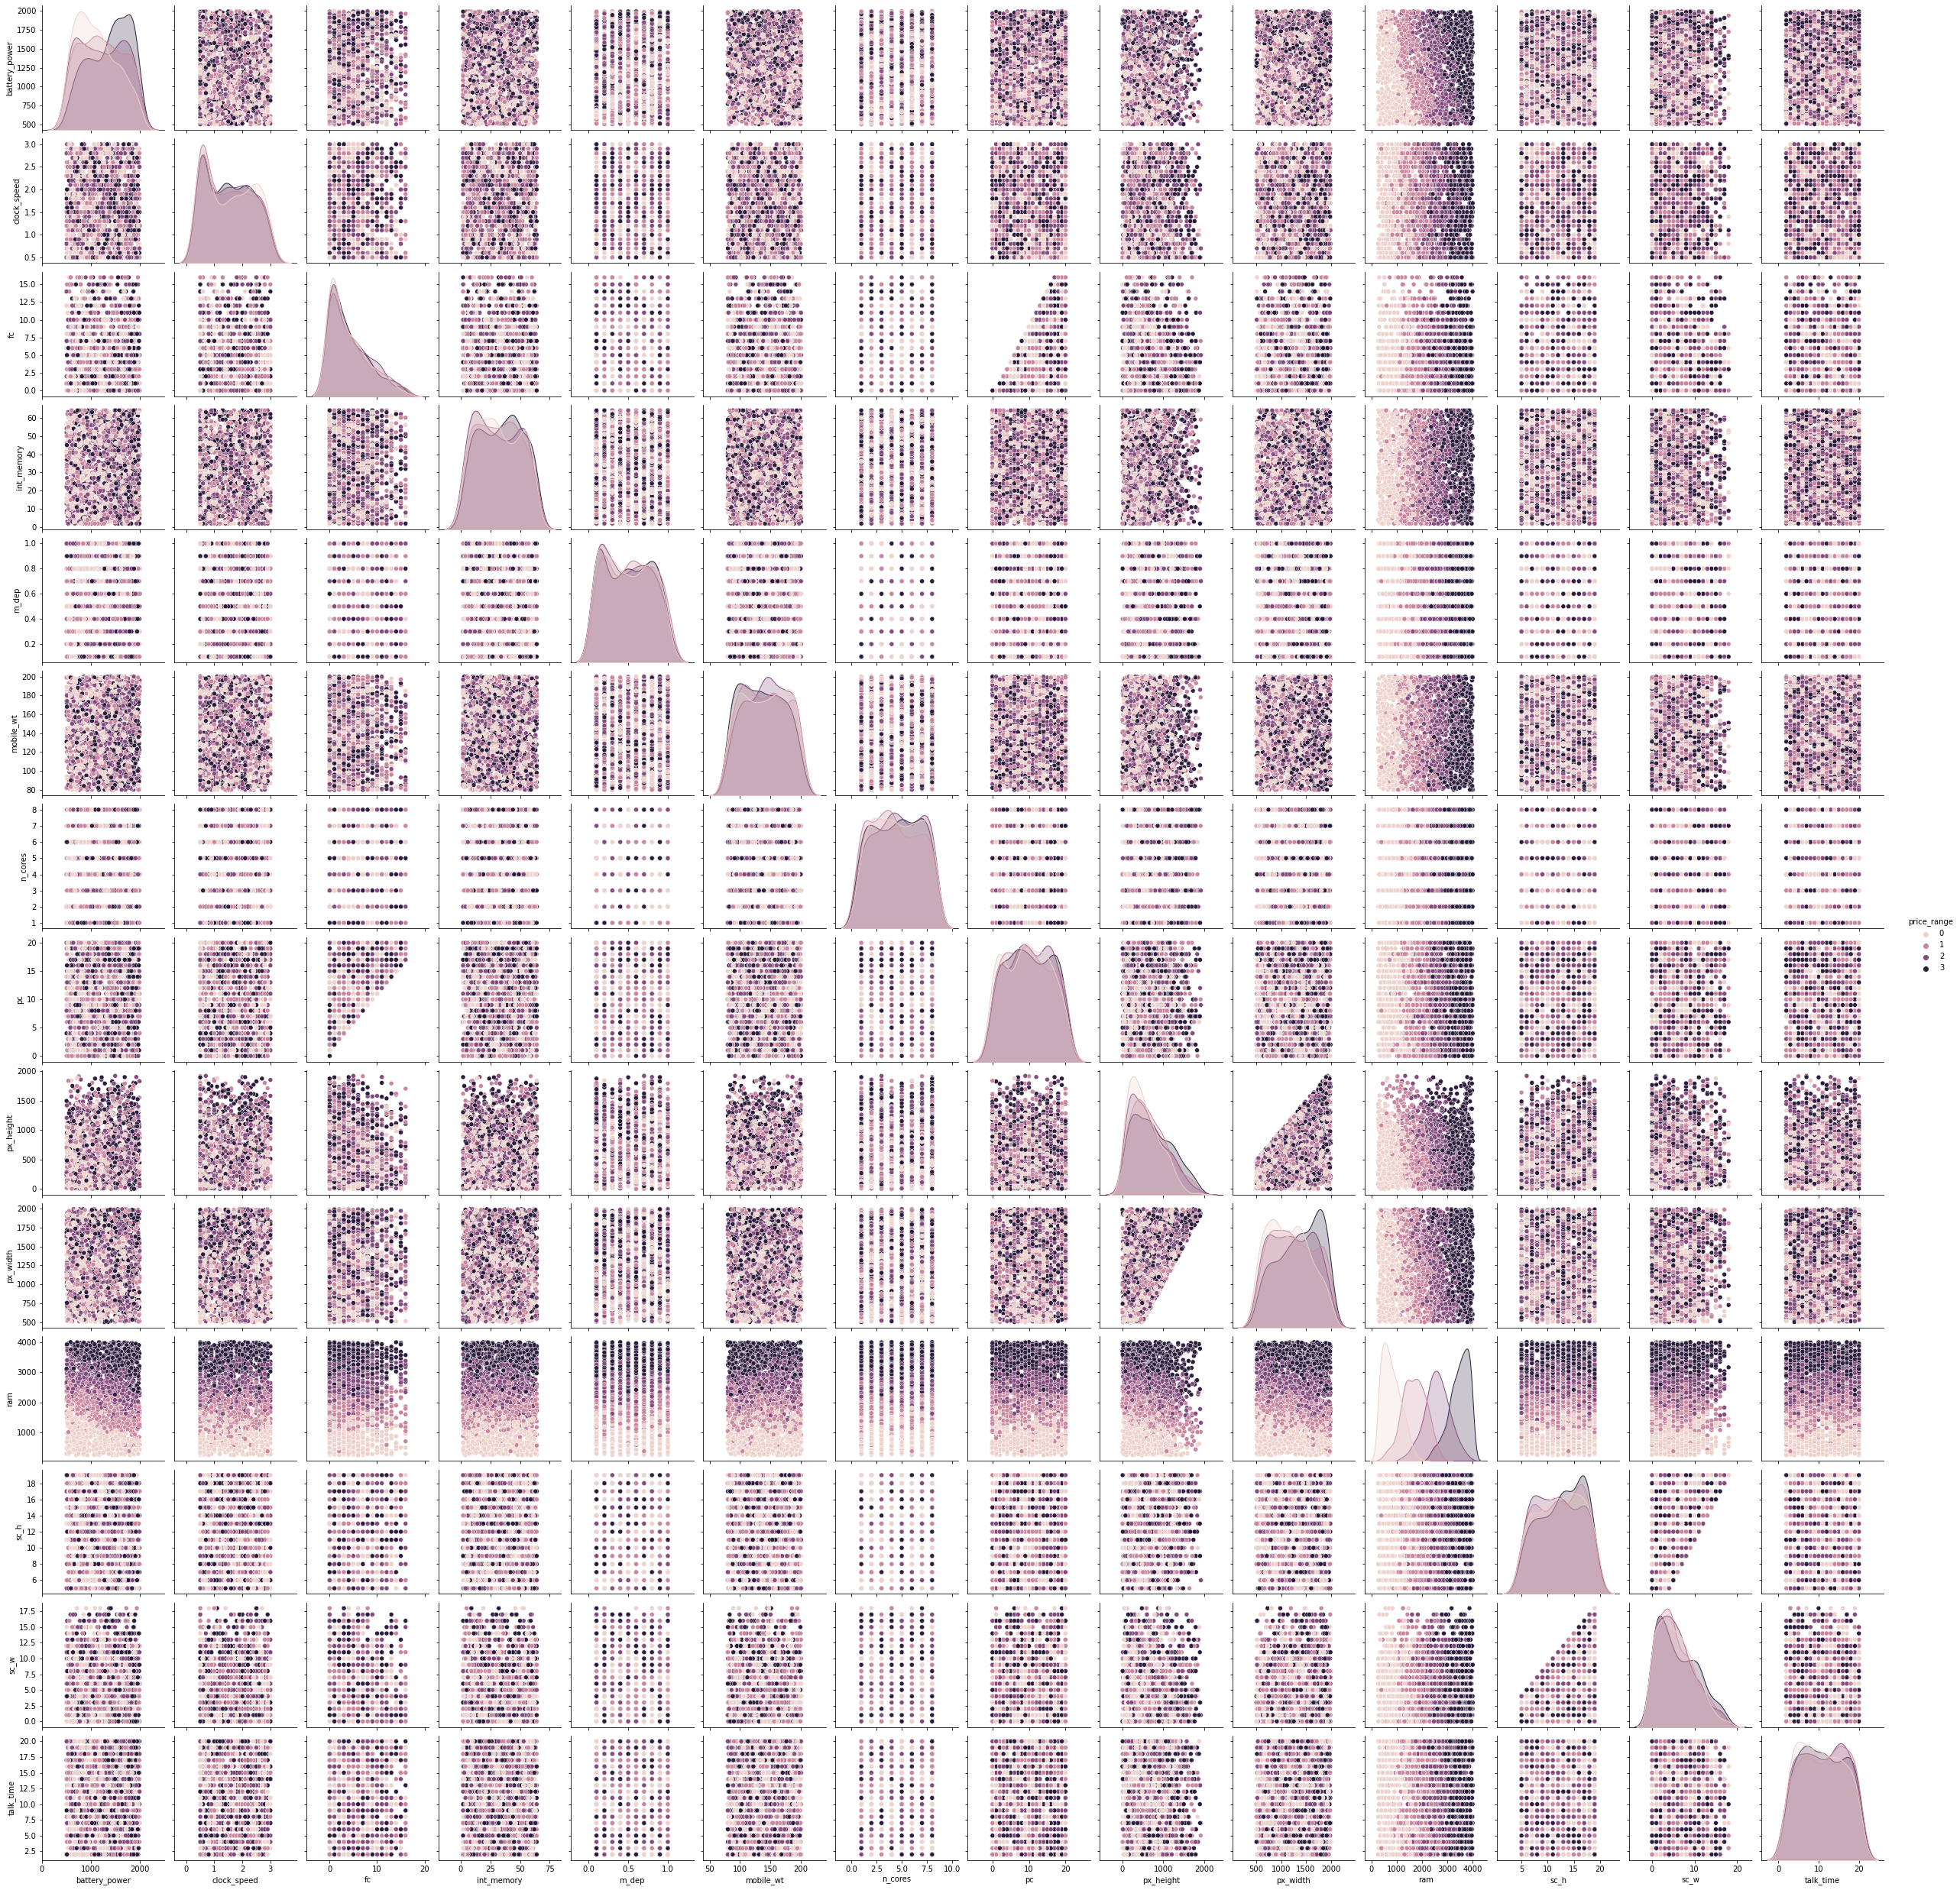

In [32]:
sns.pairplot(mydata1, kind='scatter', hue='price_range');

<AxesSubplot:xlabel='ram', ylabel='clock_speed'>

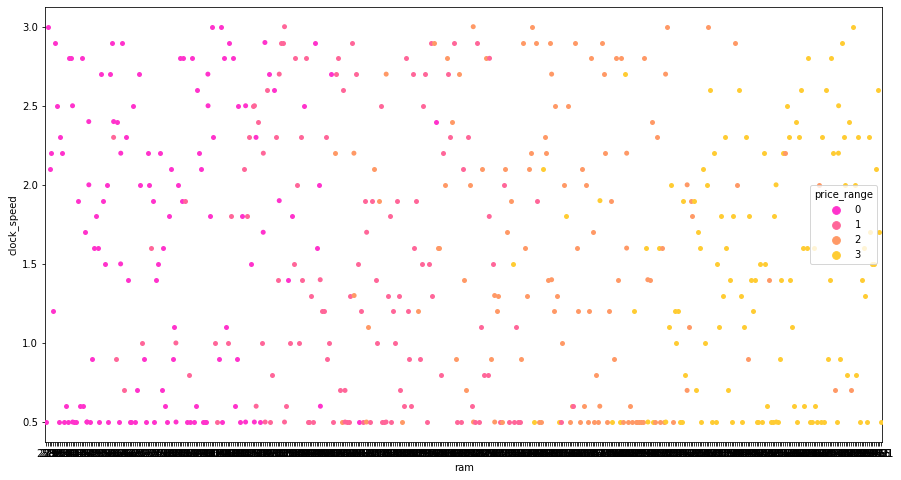

In [64]:
plt.figure(figsize=(15,8))
sns.stripplot(x='ram',y='clock_speed',data=mydata1.sample(500),palette='spring',hue='price_range')

<Figure size 1080x576 with 0 Axes>

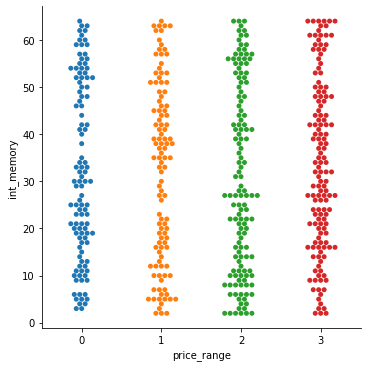

In [33]:
plt.figure(figsize=(15,8))
sns.catplot(x='price_range',y='int_memory',kind='swarm',data=mydata.sample(500));
plt.show()

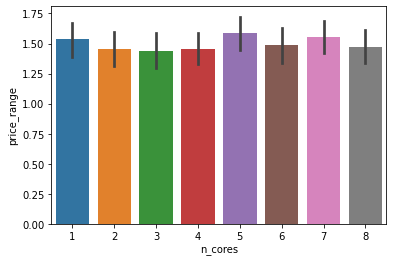

In [34]:
sns.barplot(x='n_cores',y='price_range',data=mydata1);

# Declaring Independent and Dependent Variables

In [35]:
y_dep = mydata1.price_range

In [36]:
x_ind = mydata1.drop("price_range",axis=1)

# Importing Test_Train_Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=7)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
norm=StandardScaler()

In [41]:
x_train = norm.fit_transform(x_train)

In [42]:
x_test = norm.fit_transform(x_test)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
mydata.shape

(2000, 15)

In [45]:
np.sqrt(2000)

44.721359549995796

In [46]:
KNN=KNeighborsClassifier(n_neighbors=45,p=4,metric='manhattan')

In [47]:
KNN=KNN.fit(x_train,y_train)

In [48]:
y_pred = KNN.predict(x_test)

In [49]:
y_pred

array([3, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 1, 1, 2, 3, 0, 1, 3, 2, 2,
       0, 2, 0, 0, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 0, 1,
       2, 2, 1, 0, 0, 1, 3, 0, 1, 3, 2, 1, 0, 3, 1, 1, 0, 0, 3, 3, 1, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 3, 1, 2, 2, 2, 3, 0, 2, 0, 1, 2, 3, 2, 3,
       2, 0, 0, 3, 0, 0, 1, 3, 0, 1, 0, 2, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2,
       1, 1, 0, 1, 3, 1, 0, 1, 0, 2, 2, 3, 1, 2, 0, 2, 1, 0, 2, 0, 3, 1,
       2, 0, 3, 0, 1, 1, 2, 3, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 3, 1, 2,
       0, 2, 1, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1,
       1, 0, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 3, 2,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 3, 1, 2,
       3, 1, 0, 0, 1, 3, 1, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 3, 1, 2, 3, 3,
       3, 1, 2, 0, 2, 3, 3, 0, 0, 2, 3, 2, 2, 0, 3, 1, 2, 2, 1, 1, 1, 2,
       3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 3, 2, 3, 3, 2,

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
cm=confusion_matrix(y_test,y_pred)

In [52]:
cm

array([[92, 22,  0,  0],
       [ 5, 65, 24,  1],
       [ 0, 13, 65, 11],
       [ 0,  0, 19, 79]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)

0.76010101010101

# Error Rate - Method 2

In [54]:
error_rate=[]
for i in range(1,80):
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_train,y_train)
    y_pred_er=knn_new.predict(x_test)
    error_rate.append(np.mean(y_pred_er != y_test))

Text(0, 0.5, 'Error_rate')

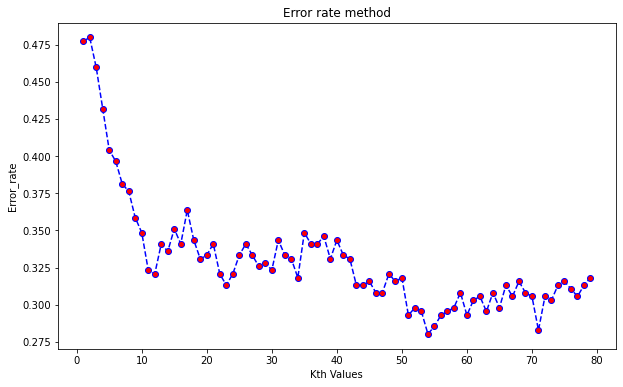

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("Error rate method")
plt.xlabel("Kth Values")
plt.ylabel("Error_rate")

# After error rate method we found the optimal k value is 55

In [58]:
KNN1=KNeighborsClassifier(n_neighbors=55,p=4,metric='manhattan')

In [59]:
KNN1=KNN1.fit(x_train,y_train)

In [60]:
y_pred1 = KNN1.predict(x_test)

In [61]:
y_pred1

array([3, 0, 2, 0, 0, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 2, 3, 0, 1, 3, 2, 3,
       0, 2, 0, 0, 3, 3, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 0, 1,
       2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 2, 1, 0, 3, 1, 0, 0, 0, 2, 3, 1, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 3, 1, 2, 2, 2, 3, 0, 2, 0, 1, 2, 3, 3, 3,
       2, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0, 2, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2,
       2, 1, 0, 1, 3, 0, 0, 1, 0, 2, 2, 3, 1, 2, 0, 1, 1, 0, 2, 0, 3, 1,
       2, 0, 3, 0, 1, 1, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 3, 2, 3, 3, 1, 2,
       0, 2, 1, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 3, 3, 1, 3, 3, 1,
       1, 0, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 1, 3, 1, 0, 2, 3, 2,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 3, 3, 1, 1, 1, 2, 1, 3, 2, 3, 1, 1,
       3, 1, 0, 0, 2, 3, 1, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 2, 1, 2, 3, 3,
       3, 1, 2, 0, 2, 1, 3, 0, 0, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 3, 3, 2,

In [62]:
cm=confusion_matrix(y_test,y_pred1)

In [63]:
cm

array([[101,  12,   1,   0],
       [  6,  67,  22,   0],
       [  0,  12,  69,   8],
       [  0,   0,  17,  81]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred1)

0.803030303030303

# The Accuracy of the model after error rate method with the optimal k value as 55 is 80.30%

# Hence the model is considered to be a good model